<a href="https://colab.research.google.com/github/JakeANam/AIstudy24/blob/master/data%EC%A0%84%EC%B2%98%EB%A6%AC%ED%95%99%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

올바른 결과를 도출하기 위해 data 사용 전, data 전처리 과정을 거친다

- 전처리 과정을 거친 데이터로 훈련했을 때의 차이
- 표준 점수로 특성의 scale변환

만약 길이가 25cm, 무게가 150g이면 도미; 근데 결과가 빙어?!
- 중간 값이 없어 판단이 불가능했던 것!(전처리가 안 되었으니까)


In [2]:
# 생선들 data 49개(도미(1) 35마리, 빙어(0) 14마리)
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]

fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [5]:
# fish_data = [[l,w] for l, w in zip(fish_length, fish_weight)] # 2차원 배열 생성
# fish_target = [1]*35 + [0]*14 # 앞 35개 1, 뒤 14개 0
# 이거보다 더 간단한 방법?

import numpy as np # python library for array
testA = np.column_stack(([1,2,3],[4,5,6])) # 열 쌓기

for i in testA: print(i)


[1 4]
[2 5]
[3 6]


In [13]:
# fish_data의 1열: 길이, 2열: 무게
fish_data = np.column_stack((fish_length, fish_weight))

print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [21]:
# 정답파일
print(np.ones(5)) # 1로만 배열
print(np.zeros(10)) # 0으로만

[1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [27]:
fish_target = np.concatenate((np.ones(35),np.zeros(14))) # 1차원 배열 생성
print(fish_target)
print(fish_target[45:])

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
[0. 0. 0. 0.]


In [37]:
from sklearn.model_selection import train_test_split
# 훈련, 테스트용 배열 생성하기
# 생성할 배열들 = train_test_split("", fish_target, stratify=fish_target, random_state=42)
# 훈련용 input, 테스트용 input, 훈련용 정답, 테스트용 정답 =  train_test_split(전체 input, 전체 정답, stratify=타겟 값 입력(class비율을 유지한 채 data set을 split), random_state=random seed 값)
# stratify - 비율을 유지하기 위해 사용
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target, random_state=42)
print(train_input.shape, test_input.shape) # 결과가 tuple로 나온다(원본 data의 손상 X)

(36, 2) (13, 2)


In [41]:
print(train_input[:5])
print()
print("tests length: %d"%len(test_input))
print(test_input)
print()
print(test_target)


[[ 29.7 500. ]
 [ 12.2  12.2]
 [ 33.  700. ]
 [ 11.3   8.7]
 [ 39.5 925. ]]

tests length: 13
[[ 11.    9.7]
 [ 11.8   9.9]
 [ 29.7 450. ]
 [ 11.8  10. ]
 [ 26.5 340. ]
 [ 12.4  13.4]
 [ 34.  685. ]
 [ 34.  575. ]
 [ 38.5 920. ]
 [ 35.  680. ]
 [ 26.3 290. ]
 [ 31.  500. ]
 [ 41.  950. ]]

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


In [87]:
from sklearn.neighbors import KNeighborsClassifier # K-이웃 근접 algorism

kn = KNeighborsClassifier()

kn.fit(train_input, train_target)

KNeighborsClassifier()

In [83]:
kn.score(test_input, test_target)

0.9230769230769231

In [88]:
print(kn.predict([[25,150]]))

[0.]


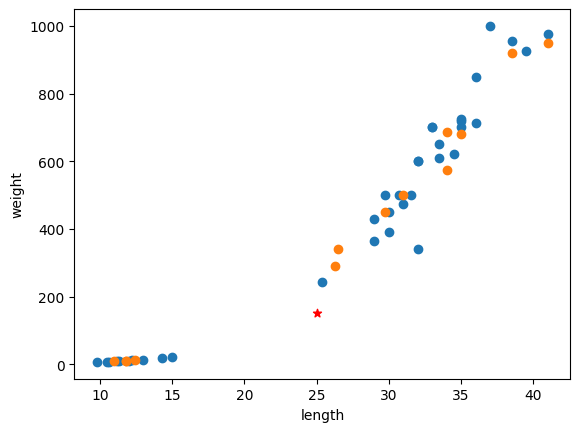

In [89]:
import matplotlib.pyplot as plt

plt.scatter(train_input[:,0], train_input[:,1]) # .scatter(train_input의 1열(길이), train_input의 2열(무게))
plt.scatter(test_input[:,0], test_input[:,1])
plt.scatter(25,150, color="red", marker="*") # marker
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

# 결론: x축과 y축의 비율이 다르기 때문에 정확성이 떨어지는 것
# # K-이웃 근접 algorism : 주변에 있는 5개를 보기 때문에

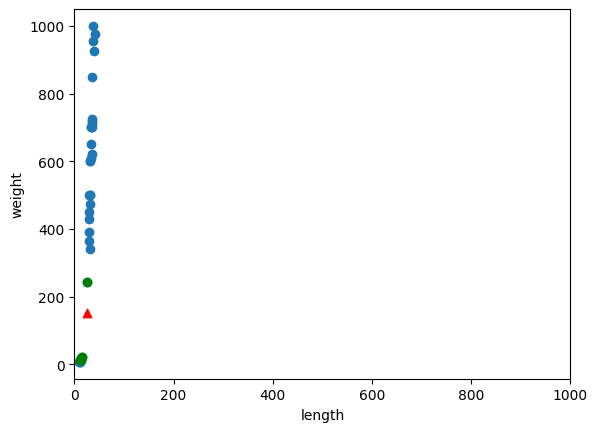

In [90]:
distances, indexes = kn.kneighbors([[25,150]]) # 내가 알고 싶은 값의 거리와 index알아보기

plt.scatter(train_input[:,0], train_input[:,1]) # 입력한 값
plt.scatter(train_input[indexes,0], train_input[indexes,1], color="green") # 타겟 값의 이웃 5개 값
plt.scatter(25,150, color="red", marker="^") # 타겟 값

plt.xlim((0,1000)) # x축의 범위 지정: ~ 에서 ~ 까지
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [93]:
print(train_input[indexes]) # k-최근접 알고리즘에 근접한 5개의 값 여기서는 (도미 1, 빙어 4개) - 그래서 빙어로 결론된 것
print(train_target[indexes])

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]
[[1. 0. 0. 0. 0.]]


In [96]:
print(distances) # 거리 측정하기

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


In [107]:
# 평균 구해보기 (가장 널리 사용하는 방법: 표준점수(z점수) 구해보기)
# 표준 점수는 각 특성 값이 평균에서 표준편차의 몇 배만큼 떨어져 있는지
# 분산: 데이터에서 평균을 뺀 값을 모두 제곱한 다음 평균을 내서 구함
# 표준편차: 분산의 제곱근 - 데이터가 분산 된 정도
# 표준 점수: 각 데이터가 원점에서 몇 표준편차만큼 떨어져 있는지

mean = np.mean(train_input, axis=0) # 평균구하기 (axis: 기준점, 중심선)
std = np.std(train_input, axis=0) # 표준편차구하기
#train_input: 36개의 요소와 2개의 특성을 가짐(여기서는 36개 sample의 길이, 무게)
# 행을 따라서 각 열의 통계 값을 계산함
print(mean, std)
print()
print("평균 길이: %fcm, 평균 무게: %fg" %(mean[0], mean[1]))
print("길이표준편차: %fcm, 무게표준편차: %fg" %(std[0], std[1]))

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]

평균 길이: 27.297222cm, 평균 무게: 454.097222g
길이표준편차: 9.982443cm, 무게표준편차: 323.298939g


In [111]:
# 원본 data에서 표준 점수 변환(평균을 빼고 표준편차로 나눠서)
train_scaled = (train_input-mean) / std # 표준점수 공식
# 원본 데이터에서 평균을 빼고 표준편차로 나누기
# numpy: train_input의 모든 행에서 평균 값을 빼주고
# std에 있는 두 표준편차를 다시 모든 행에 적용

# print(train_input)
# print()
# print(train_scaled)


[[  29.7  500. ]
 [  12.2   12.2]
 [  33.   700. ]
 [  11.3    8.7]
 [  39.5  925. ]
 [  29.   430. ]
 [  36.   714. ]
 [  36.   850. ]
 [  31.   475. ]
 [  35.   720. ]
 [  37.  1000. ]
 [  11.2    9.8]
 [  34.5  620. ]
 [  12.     9.8]
 [  29.   363. ]
 [  33.   700. ]
 [  30.7  500. ]
 [  38.5  955. ]
 [  33.5  650. ]
 [  14.3   19.7]
 [  31.5  500. ]
 [  25.4  242. ]
 [   9.8    6.7]
 [  32.   600. ]
 [  10.5    7.5]
 [  33.5  610. ]
 [  10.6    7. ]
 [  35.   700. ]
 [  32.   600. ]
 [  35.   725. ]
 [  13.    12.2]
 [  30.   450. ]
 [  32.   340. ]
 [  15.    19.9]
 [  30.   390. ]
 [  41.   975. ]]

[[ 0.24070039  0.14198246]
 [-1.51237757 -1.36683783]
 [ 0.5712808   0.76060496]
 [-1.60253587 -1.37766373]
 [ 1.22242404  1.45655528]
 [ 0.17057727 -0.07453542]
 [ 0.87180845  0.80390854]
 [ 0.87180845  1.22457184]
 [ 0.37092904  0.06465464]
 [ 0.77163257  0.82246721]
 [ 0.97198434  1.68853872]
 [-1.61255346 -1.3742613 ]
 [ 0.72154463  0.51315596]
 [-1.53241275 -1.3742613 ]
 [ 0.170

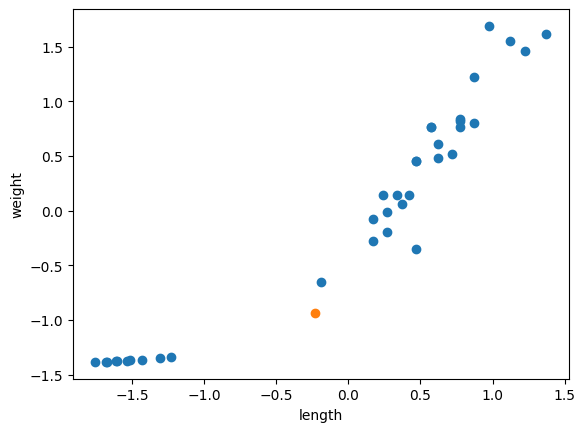

In [127]:
#  전처리 데이터를 이용해서 model훈련시키기

plt.scatter(train_scaled[:,0], train_scaled[:,1])
# plt.scatter(25,150, color="green", marker="^") # 샘플 값
# plt.scatter((25-mean[0])/std[0],(150-mean[1])/std[1], color="red", marker="^") # 샘플 값도 처리해서!
new_sample = ([25,150] - mean) / std
plt.scatter(new_sample[0], new_sample[1])

plt.xlabel("length")
plt.ylabel("weight")
plt.show()

# 전처리된 데이터는 표준점수를 위해 값이 축소됨!
# 이전graph와 차이는 없어도 범위 자체가 넓어졌기때문에
# x, y축의 범위도 비슷해져서(-1.5 ~ 1.5)

In [134]:
kn.fit(train_scaled, train_target)


In [132]:
test_scaled = (test_input - mean) / std # 훈련용도 표준점수화 했으니 정답용도 표준점수화

In [135]:
kn.score(test_scaled, test_target) # 결과 : 1 -> 예측 성공!

1.0

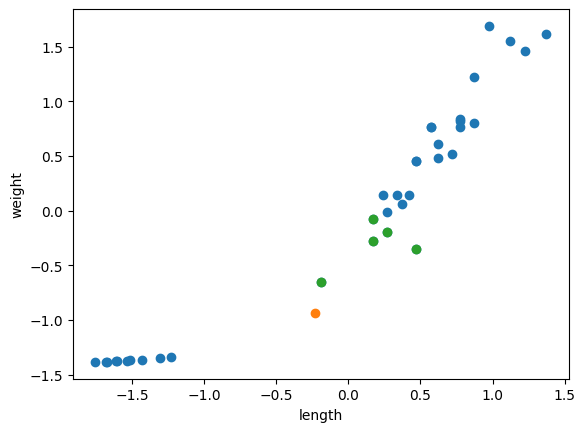

In [138]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
distances, indexes = kn.kneighbors([new_sample])
plt.scatter(new_sample[0], new_sample[1])
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1])

plt.xlabel("length")
plt.ylabel("weight")
plt.show()